In [25]:
import random
from pyomo.environ import *
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('C:/Users/ug033207/dynamic scheduling/dynamic-scheduling/functions')
from point_rating import point_rating
from Elo_rating import Elo_rating
import time
import math

In [26]:
#solution_df = pd.read_excel('C:/Users/ug033207/Almanya 22-23.xlsx', sheet_name= 'gercek solution')
df = pd.read_excel('C:/Users/ug033207/ispanya2.xlsx', sheet_name= 'match results')
n=20

teams = list(range(1,n+1))
days = list(range(1,n))
initial_ratings = {1:1983,2:1876,3:1869,4:1840,5:1827,6:1779,7:1756,8:1739,9:1708,10:1698,11:1673,12:1669,13:1651,14:1648,15:1646,16:1631, 17:1630, 18:1617, 19:1615, 20:1610}
#initial_ratings = {i: 0 for i in range(1, 19)}
#initial_ratings = {1:1958,2:1811,3:1800,4:1795,5:1737,6:1731,7:1719,8:1712,9:1682,10:1680,11:1679,12:1664,13:1621,14:1616,15:1613,16:1599,17:1597, 18:1579}
#initial_ratings = {i: 0 for i in range(1, n+1)}


ratings_history = {0: initial_ratings}
summation_squared_diff = {day: 0 for day in df['Day'].unique()}


# Initialize a counter to keep track of the number of days processed


# Iterate through each day
for day in sorted(df['Day'].unique()):
    # Filter matches for the current day
    day_matches = df[df['Day'] == day]
    r=[]
    r.append(day)

    # Calculate Elo ratings for the current day
    updated_ratings, _ = point_rating(initial_ratings, list(initial_ratings.keys()), day_matches, day_matches,r)

    # Store the ratings for the current day
    ratings_history[day] = updated_ratings

    # Update ratings for the next day
    ratings = updated_ratings

    squared_diff_sum = 0

    for _, match in day_matches.iterrows():
        team1 = match['Team 1']
        team2 = match['Team 2']
        squared_diff = round(abs((ratings[team1] - ratings[team2])),0)
        squared_diff_sum += squared_diff
        
    summation_squared_diff[day] = squared_diff_sum   


  Team 1 Team 2 Result
0     12      5     12
1      9     14    tie
2     15      4      4
3      2     18     18
4     13      7      7
5     10     20     20
6     17      1      1
7      8     19    tie
8     11      3    tie
9      6     16     16
  Team 1 Team 2 Result
0     14     18    tie
1      5     15     15
2     12     13     13
3     19      6      6
4      9      1    tie
5      8     10      8
6      3      4      4
7      7      2    tie
8     16     17     16
9     20     11     11
  Team 1 Team 2 Result
0     20      9     20
1      6     12    tie
2     16      7      7
3     18     19     19
4     17      5    tie
5     11      4      4
6      2     15      2
7     14      1      1
8     13      8    tie
9     10      3    tie
  Team 1 Team 2 Result
0      9     13    tie
1     19     20    tie
2      1      6      6
3      7      3      3
4      5      2      2
5     12     18    tie
6      8     14      8
7      4     16    tie
8     10     11     10
9     15   

[1682, 925, 1533, 829, 1346, 822, 1223, 1091, 974, 1207, 926, 1278, 1348, 1383, 1292, 847, 1087, 1556, 1355, 1207, 1186, 1326, 1153, 950, 1251, 1099, 1212, 1233, 1447, 814, 1384, 1326, 1142, 1471, 957, 1704, 1174, 699]
45439


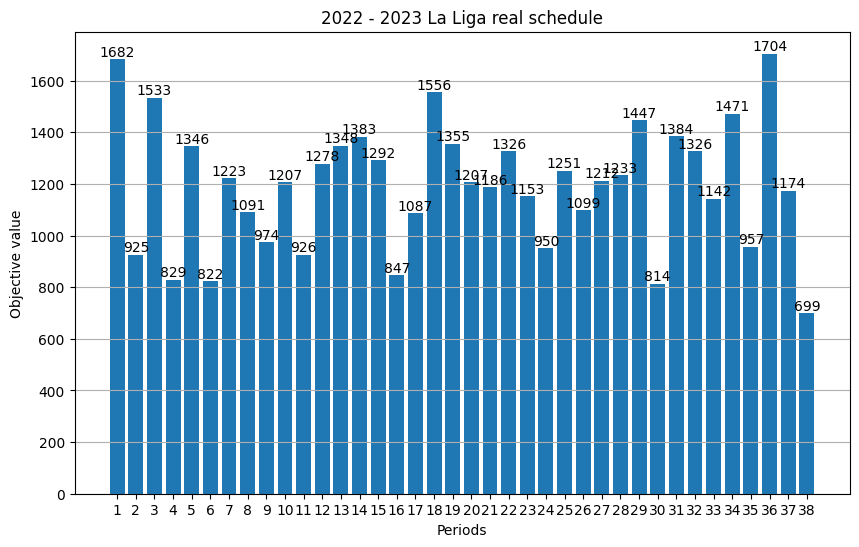

In [27]:
days = list(summation_squared_diff.keys())
summation_values = list(summation_squared_diff.values())

print(summation_values)
print(sum(summation_values))
plt.figure(figsize=(10, 6))
bars = plt.bar(days, summation_values)
plt.bar_label(bars)

plt.xlabel('Periods')
plt.ylabel('Objective value')
plt.title('2022 - 2023 La Liga real schedule')

# Change the x-axis tick labels
new_tick_labels = [i for i in range(1,39)]  # New tick labels
plt.xticks(days, new_tick_labels)
#plt.ylim(0,800)
plt.grid(axis='y')  # Show grid on the y-axis
plt.show()

In [28]:
[0, 27, 42, 42, 52, 61, 73, 71, 46, 92, 77, 85, 101, 104, 95, 77, 102, 126, 87, 145, 151, 133, 134, 134, 124, 118, 140, 155, 184, 125, 152, 165, 160, 209, 145, 230, 144, 156]

values1 = [0, 0, 0, 42, 52, 61, 73, 71, 46, 92, 77, 85, 101, 104, 95, 77, 102, 126, 87] 
values2 = [ 145, 151, 133, 134, 134, 124, 118, 140, 155, 184, 125, 152, 165, 160, 209, 145, 230, 144, 156]
sums = []
sums1 = []
# Iterate through the values in groups of three
for i in range(0, len(values1), 3):
    group = values1[i:i+3]  # Get a group of three values
    group_sum = sum(group)  # Calculate the sum of the group
    sums.append(group_sum)  # Append the sum to the list of sums

print(sums)

for i in range(0, len(values2), 3):
    group1 = values2[i:i+3]  # Get a group of three values
    group_sum1 = sum(group1)  # Calculate the sum of the group
    sums1.append(group_sum1)  # Append the sum to the list of sums

print(sums1)


[0, 155, 190, 254, 300, 305, 87]
[429, 392, 413, 461, 534, 519, 156]


[0, 155, 190, 254, 300, 305, 87, 429, 392, 413, 461, 534, 519, 156]
4195


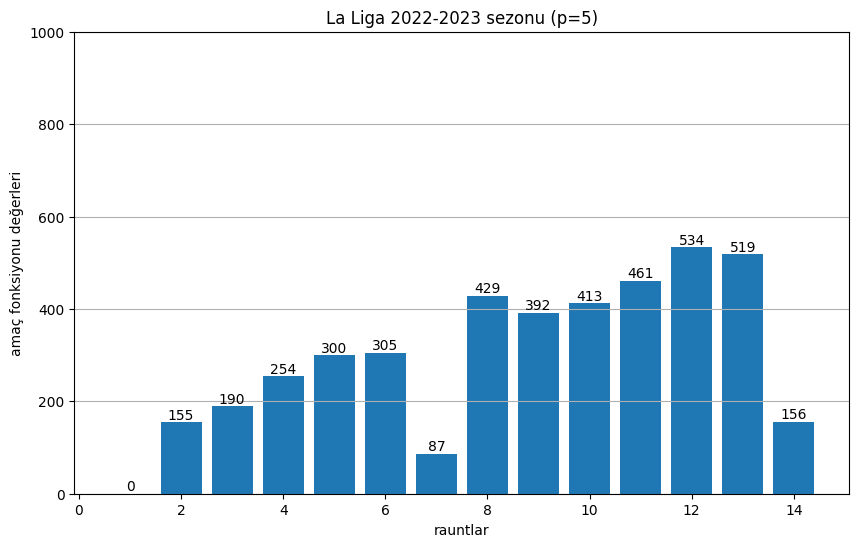

In [29]:
asdas = sums + sums1

rounds= range(1,15)
summation_values = asdas
print(summation_values)
print(sum(summation_values))
plt.figure(figsize=(10, 6))
bars = plt.bar(rounds, summation_values)
plt.bar_label(bars)

plt.xlabel('rauntlar')
plt.ylabel('amaç fonksiyonu değerleri')
plt.title('La Liga 2022-2023 sezonu (p=5)')

# Change the x-axis tick labels
#new_tick_labels = [i for i in range(1,13)]  # New tick labels
#plt.xticks(days, new_tick_labels)

plt.grid(axis='y')  # Show grid on the y-axis
plt.ylim(0,1000)
plt.show()

In [30]:
data = [{1: 1960.1888459727004, 2: 1808.5091693712247, 3: 1804.9280491829095, 4: 1790.0719508170905, 5: 1734.8111540272996, 6: 1734.1867816483361, 7: 1722.559661461777, 8: 1716.3135860811633, 9: 1680.8005864095549, 10: 1684.0475696034844, 11: 1682.599350001971, 12: 1659.6864139188367, 13: 1623.4908306287753, 14: 1612.440338538223, 15: 1608.9524303965156, 16: 1595.8132183516639, 17: 1598.1994135904451, 18: 1575.400649998029}
,{1: 1961.8571102075525, 2: 1806.7725486337183, 3: 1808.764392530247, 4: 1782.7173000940281, 5: 1732.9111173724518, 6: 1733.4701880900986, 7: 1718.7233181144395, 8: 1714.3900195608321, 9: 1679.1323221747027, 10: 1684.7641631617219, 11: 1684.3359707394775, 12: 1663.9614387888212, 13: 1623.1274994227394, 14: 1619.7949892612853, 15: 1604.6774055265312, 16: 1597.7132550065116, 17: 1598.562744796481, 18: 1577.3242165183601}
,{1: 1962.9914931945477, 2: 1800.7330214623873, 3: 1801.0613712768484, 4: 1776.0718525168531, 5: 1732.2165842742672, 6: 1739.5097152614296, 7: 1722.3812806677208, 8: 1717.771304517598, 9: 1677.7077284869094, 10: 1688.8399293142195, 11: 1685.030503837662, 12: 1670.6068863659962, 13: 1619.4695368694581, 14: 1615.7192231087877, 15: 1603.543022539536, 16: 1594.3319700497457, 17: 1606.2657660498796, 18: 1578.7488102061534}
,{1: 1959.9513099821672, 2: 1804.0330093986477, 3: 1803.393906812343, 4: 1779.8422142634245, 5: 1735.4794447136987, 6: 1742.3482753385713, 7: 1725.7347758079534, 8: 1720.8114877299786, 9: 1674.4077405506491, 10: 1685.0695675676482, 11: 1684.0980469978283, 12: 1674.8234957325728, 13: 1620.401993709292, 14: 1611.502613742211, 15: 1600.1895273993034, 16: 1591.999434514251, 17: 1603.0029056104481, 18: 1575.9102501290117}
,{1: 1957.173772822004, 2: 1798.0590511332693, 3: 1806.6237060096091, 4: 1774.0697801704682, 5: 1741.453402979077, 6: 1745.1258124987346, 7: 1731.5072099009096, 8: 1715.2989270136218, 9: 1669.5471591208914, 10: 1690.582128284005, 11: 1688.958628427586, 12: 1671.5936965353067, 13: 1619.7651832115628, 14: 1606.2222348700354, 15: 1595.230014281456, 16: 1597.2798133864267, 17: 1607.9624187282955, 18: 1576.5470606267409}
,{1: 1953.4277487365841, 2: 1803.182281464494, 3: 1801.5004756783844, 4: 1771.7245662496173, 5: 1735.4331150529576, 6: 1749.324470542051, 7: 1731.2741230269658, 8: 1715.5320138875657, 9: 1675.5674470470108, 10: 1685.3091345378746, 11: 1684.7599703842698, 12: 1676.866690281437, 13: 1623.5112072969825, 14: 1611.2472779194402, 15: 1589.961403822651, 16: 1599.6250273072776, 17: 1602.9373756788907, 18: 1581.815671085546}
,{1: 1944.6519070915278, 2: 1796.9469885486092, 3: 1803.7022934316897, 4: 1769.4701490781767, 5: 1738.8759247553728, 6: 1753.2786847756836, 7: 1730.497475268858, 8: 1721.7673068034505, 9: 1671.613232813378, 10: 1684.1004467688188, 11: 1683.4285862888455, 12: 1677.643338039545, 13: 1620.0683975945674, 14: 1620.0231195644965, 15: 1591.2927879180752, 16: 1600.8337150763334, 17: 1605.1917928503312, 18: 1579.6138533322408}
,{1: 1947.3247846016293, 2: 1799.2906117837647, 3: 1797.0373960389938, 4: 1766.7972715680753, 5: 1744.083078484485, 6: 1748.0715310465714, 7: 1734.8337093844082, 8: 1715.1498962771702, 9: 1675.8768378004315, 10: 1679.7642126532685, 11: 1690.0934836815413, 12: 1676.5556217812912, 13: 1615.804792607514, 14: 1624.4441915830168, 15: 1588.9491646829197, 16: 1601.9214313345872, 17: 1611.8092033766115, 18: 1575.1927813137204}
,{1: 1945.2874842007466, 2: 1797.6352834337715, 3: 1799.0746964398766, 4: 1769.2891207882597, 5: 1736.9879431278189, 6: 1751.2549797745532, 7: 1733.009099735152, 8: 1719.7899293635924, 9: 1675.142022371136, 10: 1681.4195410032617, 11: 1685.4534505951192, 12: 1670.634484475893, 13: 1612.621343879532, 14: 1625.1790070123125, 15: 1596.0443000395858, 16: 1603.7460409838434, 17: 1617.7303406820097, 18: 1572.700932093536}
,{1: 1947.5633791440466, 2: 1800.102607426794, 3: 1793.390828290766, 4: 1763.8256041697687, 5: 1742.4514597463099, 6: 1756.9388479236638, 7: 1730.733204791852, 8: 1719.1509080752735, 9: 1675.7810436594548, 10: 1685.5131101084337, 11: 1689.5946302518996, 12: 1674.2612847923178, 13: 1617.382961905708, 14: 1621.037827355532, 15: 1591.2826820134098, 16: 1601.2787169908208, 17: 1613.6367715768376, 18: 1569.0741317771112}
,{1: 1949.2809101398725, 2: 1797.7319370723283, 3: 1796.0544027785315, 4: 1762.5849847676827, 5: 1747.1166396682204, 6: 1749.7204749788268, 7: 1734.1090853461524, 8: 1714.485728153363, 9: 1677.0216630615407, 10: 1690.5718452030378, 11: 1684.5358951572955, 12: 1672.543753796492, 13: 1614.7193874179425, 14: 1623.4084977099978, 15: 1598.5010549582469, 16: 1605.8165785386716, 17: 1610.2608910225372, 18: 1564.5362702292605}
,{1: 1951.1212547550886, 2: 1802.2278501322621, 3: 1800.3547526441034, 4: 1758.0890717077489, 5: 1742.8162898026485, 6: 1754.2151374479686, 7: 1736.845669790706, 8: 1709.9910656842212, 9: 1680.9105143285437, 10: 1688.7315005878218, 11: 1684.3633828731624, 12: 1672.716266080625, 13: 1619.8444077027546, 14: 1618.2834774251858, 15: 1594.6122036912438, 16: 1600.880533848355, 17: 1615.1969357128537, 18: 1561.7996857847068}
,{1: 1952.2964339475802, 2: 1805.4458138778007, 3: 1802.69746343484, 4: 1763.0333236225233, 5: 1746.0971191466376, 6: 1749.2708855331941, 7: 1741.0960816731526, 8: 1713.7221000224374, 9: 1686.0230483609894, 10: 1683.6189665553761, 11: 1680.112970990716, 12: 1669.4983023350865, 13: 1616.1133733645383, 14: 1615.0026480811966, 15: 1592.2694929005072, 16: 1599.7053546558634, 17: 1619.4344812691936, 18: 1557.5621402283668}
,{1: 1953.5793966281603, 2: 1809.5301927492283, 3: 1796.078778659621, 4: 1766.8621565854846, 5: 1750.0122934418002, 6: 1747.4293848188743, 7: 1737.011702801725, 8: 1707.0421350586132, 9: 1692.6417331362084, 10: 1676.8804857046052, 11: 1676.2841380277546, 12: 1665.5831280399238, 13: 1620.877418384896, 14: 1616.8441487955165, 15: 1598.9494578643314, 16: 1594.9413096355058, 17: 1618.1515185886135, 18: 1564.3006210791377}
,{1: 1954.540796849471, 2: 1812.0244747721208, 3: 1789.8247705403592, 4: 1769.8767553225848, 5: 1748.9751148692762, 6: 1742.2795072372776, 7: 1742.1615803833217, 8: 1713.2961431778751, 9: 1697.253113904469, 10: 1677.9176642771292, 11: 1670.134450512334, 12: 1660.9717472716632, 13: 1617.8628196477957, 14: 1611.5868509690813, 15: 1604.2067556907666, 16: 1601.0909971509263, 17: 1615.657236565721, 18: 1563.339220857827}
,{1: 1952.5976058683689, 2: 1813.967665753223, 3: 1792.46333502809, 4: 1774.069617589656, 5: 1751.5317974162022, 6: 1746.130297725364, 7: 1736.5188709449465, 8: 1709.103280910804, 9: 1702.8958233428443, 10: 1677.0619113119915, 11: 1674.3568227819844, 12: 1657.1209567835767, 13: 1618.7185726129335, 14: 1608.9482864813506, 15: 1609.1619175229682, 16: 1596.1358353187247, 17: 1611.4348642960706, 18: 1560.7825383109011}
,{1: 1949.2750715275495, 2: 1815.8562411127787, 3: 1795.8610694536374, 4: 1776.859903899676, 5: 1751.3158784054278, 6: 1749.283485499046, 7: 1736.7347899557208, 8: 1702.7005756580857, 9: 1706.4060206212757, 10: 1673.664176886444, 11: 1677.6793571228038, 12: 1656.5705417169402, 13: 1619.26898767957, 14: 1615.3509917340689, 15: 1606.3716312129482, 16: 1592.6256380402933, 17: 1608.2816765223886, 18: 1558.8939629513454}
,{1: 1946.6991111392472, 2: 1818.2948135573322, 3: 1800.5878929999692, 4: 1772.1330803533442, 5: 1753.8918387937301, 6: 1752.1703030149574, 7: 1740.0557035005834, 8: 1707.0405848031003, 9: 1700.0302827084415, 10: 1677.7076898330631, 11: 1676.033530572894, 12: 1652.2305325719256, 13: 1616.8304152350165, 14: 1612.0300781892063, 15: 1602.328118266329, 16: 1589.738820524382, 17: 1614.6574144352228, 18: 1560.5397895012552}
,{1: 1948.6458211663116, 2: 1816.3547394104744, 3: 1804.725473288112, 4: 1764.9793454025082, 5: 1756.6908729830766, 6: 1756.1148113479958, 7: 1735.9181232124406, 8: 1705.0489315550417, 9: 1698.083572681377, 10: 1673.7631815000248, 11: 1677.9736047197518, 12: 1646.5172771357031, 13: 1611.7991436474667, 14: 1619.1838131400423, 15: 1608.0413737025515, 16: 1586.9397863350355, 17: 1619.6886860227726, 18: 1562.5314427493138}
,{1: 1949.8797593667464, 2: 1810.4964011391185, 3: 1807.2887243762827, 4: 1768.337669001202, 5: 1750.5770341923508, 6: 1761.9731496193517, 7: 1739.2042061639563, 8: 1698.4117881012592, 9: 1696.2261233192505, 10: 1677.984119274684, 11: 1684.0874435104777, 12: 1643.1589535370094, 13: 1608.513060695951, 14: 1614.962875365383, 15: 1606.8074355021167, 16: 1593.576929788818, 17: 1617.1254349346018, 18: 1564.3888921114403}
,{1: 1941.7835237955567, 2: 1813.9087576239804, 3: 1809.5501466384337, 4: 1762.065918127043, 5: 1753.745700479057, 6: 1759.4011550341986, 7: 1742.386030801609, 8: 1706.5080236724489, 9: 1692.8137668343886, 10: 1684.2558701488429, 11: 1678.0166755482057, 12: 1637.754067837561, 13: 1614.583828658223, 14: 1620.3677610648315, 15: 1603.625610864464, 16: 1591.315507526667, 17: 1613.9567686478956, 18: 1566.9608866965934}
,{1: 1944.3760104114037, 2: 1818.0514930535335, 3: 1812.2613661170917, 4: 1761.7830042899916, 5: 1749.6029650495038, 6: 1756.8086684183515, 7: 1742.6689446386604, 8: 1701.1882265907777, 9: 1697.600948231972, 10: 1689.575667230514, 11: 1673.2294941506223, 12: 1635.042848358903, 13: 1608.902739564864, 14: 1614.9506372730668, 15: 1598.7742443718193, 16: 1596.7326313184317, 17: 1618.8081351405403, 18: 1572.6419757899523}
,{1: 1945.6422556260577, 2: 1812.9681741420477, 3: 1817.3446850285775, 4: 1764.571638694683, 5: 1748.8601346292185, 6: 1755.6285443540228, 7: 1742.074809421901, 8: 1701.7823618075372, 9: 1698.3437786522575, 10: 1693.7972586562692, 11: 1674.409618214951, 12: 1630.8212569331479, 13: 1607.6364943502101, 14: 1620.0061488488734, 15: 1593.3988783763289, 16: 1593.9439969137402, 17: 1613.7526235647338, 18: 1578.0173417854428}
,{1: 1946.9724605880601, 2: 1816.4205559311738, 3: 1814.3585053496922, 4: 1767.5279617542578, 5: 1746.9327598127818, 6: 1754.811540347839, 7: 1745.5263098013183, 8: 1698.329980018411, 9: 1699.1607826584413, 10: 1692.3985549080073, 11: 1668.2644581526058, 12: 1627.3697565537304, 13: 1609.5638691666468, 14: 1618.675943886871, 15: 1599.544038438674, 16: 1595.342700662002, 17: 1610.796300505159, 18: 1581.003521464328}
,{1: 1939.597556294376, 2: 1808.6502561666298, 3: 1817.3717792017123, 4: 1774.9028660479419, 5: 1742.0461251472777, 6: 1759.698175013343, 7: 1744.767643965345, 8: 1697.0962626584706, 9: 1702.8992218386109, 10: 1693.1572207439806, 11: 1665.2511843005857, 12: 1631.910151247519, 13: 1605.8254299864773, 14: 1618.1359088973559, 15: 1607.314338203218, 16: 1590.8023059682134, 17: 1612.0300178650996, 18: 1581.5435564538434}
,{1: 1942.9077280313586, 2: 1802.0468076803181, 3: 1814.0616074647298, 4: 1777.3758640149954, 5: 1740.1988611445297, 6: 1762.618025274922, 7: 1742.6863924629267, 8: 1696.6392542162089, 9: 1701.7030189674924, 10: 1699.7606692302923, 11: 1665.7081927428474, 12: 1636.6243649583605, 13: 1602.9055797248982, 14: 1619.3321117684743, 15: 1609.1616022059661, 16: 1592.8835574706318, 17: 1607.315804154258, 18: 1579.0705584867899}
,{1: 1945.3079338821647, 2: 1804.3543799005322, 3: 1818.3266380539974, 4: 1781.8428765954386, 5: 1735.7318485640865, 6: 1758.3529946856545, 7: 1740.2861866121207, 8: 1701.7121224893783, 9: 1696.630150694323, 10: 1698.4608123388145, 11: 1670.0447230071582, 12: 1640.803592998363, 13: 1607.9956013966473, 14: 1614.9955815041635, 15: 1604.071580534217, 16: 1590.5759852504177, 17: 1608.6156610457358, 18: 1574.8913304467874}
,{1: 1941.7847922647263, 2: 1806.870493263946, 3: 1815.6222992010917, 4: 1780.640578219966, 5: 1735.243824027351, 6: 1756.2679840339194, 7: 1743.4770876349946, 8: 1702.2001470261139, 9: 1697.8324490697955, 10: 1698.0527813477763, 11: 1670.4527539981964, 12: 1644.3267346158013, 13: 1610.699940249553, 14: 1612.4794681407498, 15: 1606.156591185952, 16: 1585.350418136735, 17: 1605.4247600228618, 18: 1580.11689756047}
,{1: 1933.7581429167758, 2: 1801.493729972367, 3: 1819.4857644490266, 4: 1786.017341511545, 5: 1731.380358779416, 6: 1760.4961062598127, 7: 1746.285329912052, 8: 1697.9720248002207, 9: 1701.5429170477082, 10: 1706.0794306957268, 11: 1675.0774774291742, 12: 1639.7020111848235, 13: 1610.7255494905787, 14: 1612.453858899724, 15: 1602.4461232080394, 16: 1580.6389900908819, 17: 1610.136188068715, 18: 1577.3086552834127}
,{1: 1934.916246819278, 2: 1804.320243118868, 3: 1816.7138382216228, 4: 1785.6507205782364, 5: 1729.7327218204193, 6: 1760.8627271931214, 7: 1750.2746780808948, 8: 1691.742189793072, 9: 1706.6081990171779, 10: 1701.0141487262572, 11: 1671.0881292603312, 12: 1636.8754980383226, 13: 1616.9553844977274, 14: 1614.1014958587207, 15: 1605.2180494354432, 16: 1579.4808861883796, 17: 1604.665162748991, 18: 1582.7796806031367}
,{1: 1936.2161119007558, 2: 1808.5486782287094, 3: 1820.1802891638818, 4: 1779.0592954861424, 5: 1723.4273333911228, 6: 1753.8679215923378, 7: 1746.0462429710533, 8: 1695.5221260949284, 9: 1703.141748074919, 10: 1694.3753952780155, 11: 1677.6795543524252, 12: 1643.180886467619, 13: 1611.4181648105416, 14: 1621.0963014595043, 15: 1601.4381131335867, 16: 1585.0181058755654, 17: 1603.3652976675132, 18: 1589.4184340513784}
,{1: 1937.4120019761417, 2: 1810.8971681604553, 3: 1823.4595280291853, 4: 1776.8180379822122, 5: 1728.0102141070977, 6: 1758.7553776010498, 7: 1741.1587869623413, 8: 1692.2428872296248, 9: 1707.2873080760896, 10: 1689.7925145620407, 11: 1681.3767917016291, 12: 1639.0353264664484, 13: 1613.6594223144718, 14: 1615.813698897479, 15: 1606.720715695612, 16: 1581.3208685263614, 17: 1601.0168077357673, 18: 1588.2225439759925}
,{1: 1930.6677293602324, 2: 1817.6414407763646, 3: 1825.7826420152307, 4: 1775.6243883253435, 5: 1726.1004618657287, 6: 1752.097568286887, 7: 1745.672875637263, 8: 1693.4365368864935, 9: 1702.773219401168, 10: 1683.7140775227244, 11: 1680.2405093130048, 12: 1645.693135780611, 13: 1619.737859353788, 14: 1613.4905849114336, 15: 1606.3558323295013, 16: 1581.6857518924721, 17: 1602.1530901243916, 18: 1590.1322962173615}
,{1: 1932.5807451157616, 2: 1819.7668984479371, 3: 1823.844924260358, 4: 1768.3644555105775, 5: 1731.3818339589045, 6: 1755.06438511109, 7: 1740.391503544087, 8: 1697.3059067006673, 9: 1696.0979176446483, 10: 1685.651795277597, 11: 1678.3274935574757, 12: 1645.3203026480887, 13: 1620.1106924863104, 14: 1609.62121509726, 15: 1613.6157651442672, 16: 1588.3610536489919, 17: 1599.1862733001888, 18: 1588.006838545789}
]

df = pd.DataFrame(data)

nump = np.array(df)
nump = np.round(nump,0)
df=pd.DataFrame(nump)
df.to_excel('data_table.xlsx', index = False)